In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
tdf=pd.read_csv('titanic_train.csv')
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<AxesSubplot:>

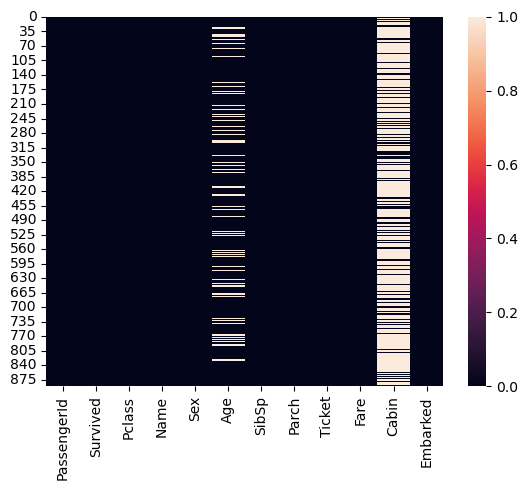

In [11]:
sns.heatmap(tdf.isnull())

In [6]:
tdf.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
imp=SimpleImputer(strategy="most_frequent")
tdf['Cabin']=imp.fit_transform(tdf['Cabin'].values.reshape(-1,1))
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
tdf['Age']=imp.fit_transform(tdf['Age'].values.reshape(-1,1))
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [15]:
le=LabelEncoder()
tdf['Name']=le.fit_transform(tdf['Name'])
list1=['Name','Sex','Ticket','Cabin','Embarked']
for val in list1:
    tdf[val]=le.fit_transform(tdf[val].astype(str))
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,11,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,102,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,283,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,193,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,57,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,499,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,228,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,350,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,790,1,26.000000,0,0,8,30.0000,60,0


In [16]:
tdf.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin          2.268926
Embarked      -1.246689
dtype: float64

<AxesSubplot:ylabel='Frequency'>

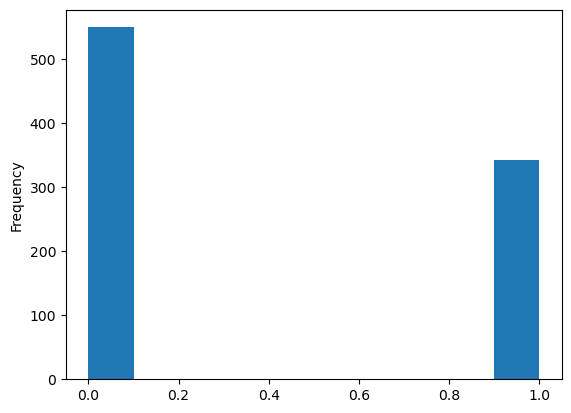

In [17]:
tdf['Survived'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

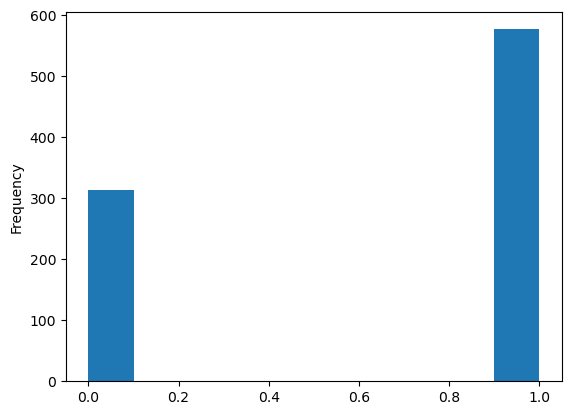

In [18]:
tdf['Sex'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

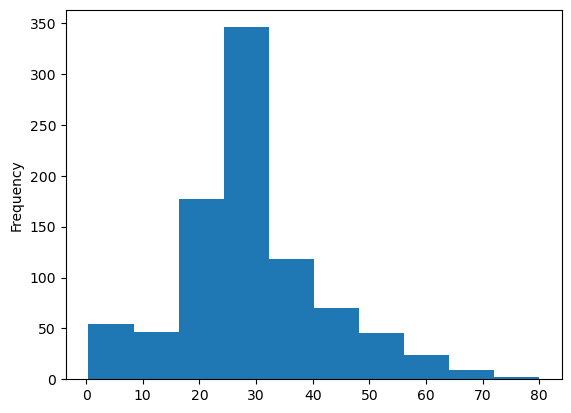

In [20]:
tdf['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

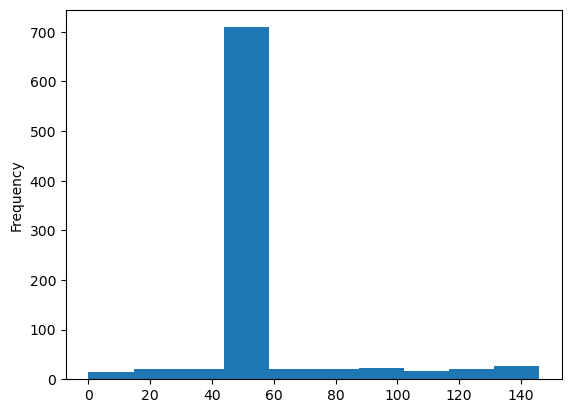

In [21]:
tdf['Cabin'].plot.hist()

PassengerId       AxesSubplot(0.125,0.53;0.110714x0.35)
Survived       AxesSubplot(0.257857,0.53;0.110714x0.35)
Pclass         AxesSubplot(0.390714,0.53;0.110714x0.35)
Age            AxesSubplot(0.523571,0.53;0.110714x0.35)
SibSp          AxesSubplot(0.656429,0.53;0.110714x0.35)
Parch          AxesSubplot(0.789286,0.53;0.110714x0.35)
Fare              AxesSubplot(0.125,0.11;0.110714x0.35)
dtype: object

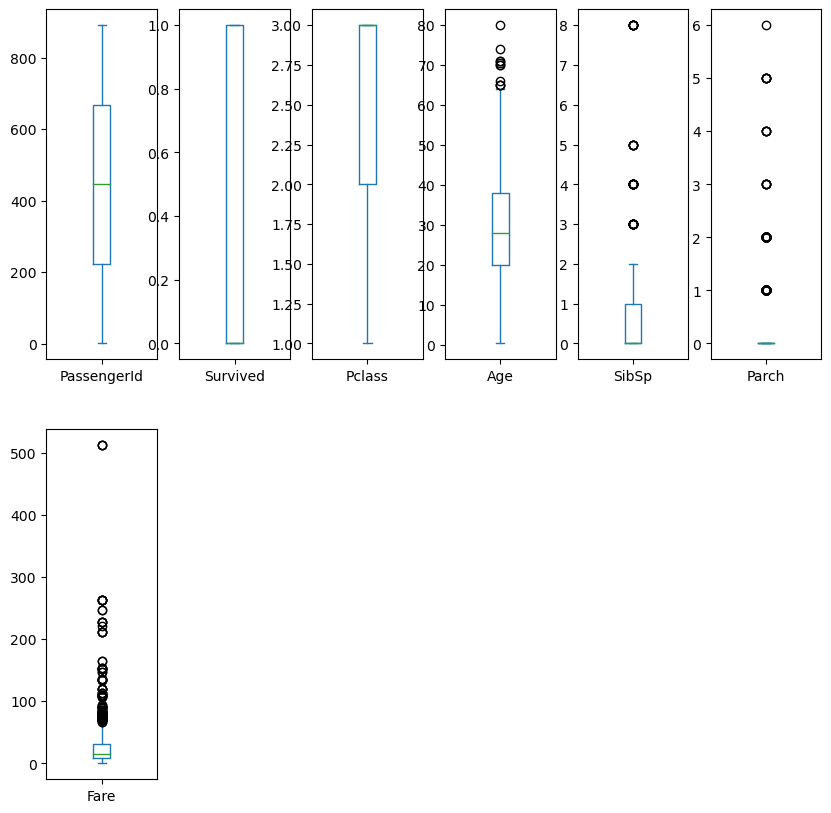

In [7]:
tdf.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [25]:
z=np.abs(zscore(tdf))
z

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.730108,0.789272,0.827377,1.687341,0.737695,0.592481,0.432793,0.473674,0.918966,0.502445,0.281881,0.581114
1,1.726220,1.266990,1.566107,1.333544,1.355574,0.638789,0.432793,0.473674,1.282625,0.786845,1.161545,1.938460
2,1.722332,1.266990,0.827377,0.629837,1.355574,0.284663,0.474545,0.473674,1.646283,0.488854,0.281881,0.581114
3,1.718444,1.266990,1.566107,0.979747,1.355574,0.407926,0.432793,0.473674,1.442322,0.420730,0.057748,0.581114
4,1.714556,0.789272,0.827377,1.508499,0.737695,0.407926,0.474545,0.473674,0.664904,0.486337,0.281881,0.581114
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,0.789272,0.369365,0.209946,0.737695,0.207709,0.474545,0.473674,1.183277,0.386671,0.281881,0.581114
887,1.718444,1.266990,1.566107,0.843671,1.355574,0.823344,0.474545,0.473674,1.616678,0.044381,1.003594,0.581114
888,1.722332,0.789272,0.827377,0.369349,1.355574,0.000000,0.432793,2.008933,1.676173,0.176263,0.281881,0.581114
889,1.726220,1.266990,1.566107,1.341320,0.737695,0.284663,0.474545,0.473674,1.646568,0.044381,0.270017,1.938460


In [26]:
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
       311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
       434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
       558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885], dtype=int64), array([10, 10,  7,  6,  7,  9,  6,  6, 10,  6,  6, 10,  7,  9,  5,  5,  9,
        6, 10, 10,  6,  6,  7,  6,  6,  6, 10, 10,  6, 10,  6, 10,  9,  6,
       10,  6,  6,  9, 10,  9,  6, 10, 10, 10,  9, 10,  7, 10,  9,  9,  6,
       10, 10,  7,  7,  9, 10, 10,  6,  5, 10,  9,  6,  6,  9, 10,  7, 10,
       10,  7, 10,  5,  7, 10,  5,  7,  9,  6,  6,  9, 10,  9, 10,  9, 10,
        9,  7,  

In [28]:
tdf.shape

(891, 12)

In [29]:
tdf_new=tdf[(z<3).all(axis=1)]

In [31]:
tdf_new.shape

(786, 12)

In [55]:
tdf_new.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,446.942748,0.382952,2.333333,443.166667,0.664122,29.750921,0.342239,0.244275,335.338422,25.334223,50.711196,1.536896
std,255.668103,0.486416,0.819093,258.119799,0.472597,11.903917,0.619161,0.558774,199.445914,29.753207,17.247521,0.794431
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,227.250000,0.000000,2.000000,231.250000,0.000000,23.000000,0.000000,0.000000,159.250000,7.895800,47.000000,1.000000
50%,448.500000,0.000000,3.000000,438.500000,1.000000,29.699118,0.000000,0.000000,337.000000,13.000000,47.000000,2.000000
75%,661.750000,1.000000,3.000000,662.750000,1.000000,34.375000,1.000000,0.000000,508.750000,26.550000,47.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,66.000000,3.000000,2.000000,680.000000,164.866700,124.000000,3.000000


In [40]:
x=tdf_new.iloc[:,2:12]

In [41]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,11,1,22.000000,1,0,523,7.2500,47,2
1,1,102,0,38.000000,1,0,596,71.2833,81,0
2,3,283,0,26.000000,0,0,669,7.9250,47,2
3,1,193,0,35.000000,1,0,49,53.1000,55,2
4,3,57,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,2,499,1,27.000000,0,0,101,13.0000,47,2
887,1,228,0,19.000000,0,0,14,30.0000,30,2
888,3,350,0,29.699118,1,2,675,23.4500,47,2
889,1,790,1,26.000000,0,0,8,30.0000,60,0


In [44]:
y=tdf_new.iloc[:,1:2]

In [45]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [47]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=45)

In [48]:
x.shape

(786, 10)

In [49]:
y.shape

(786, 1)

In [52]:
tdf_new.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.012587,-0.022799,-0.071159,0.070057,-0.005677,-0.053197,0.019475,-0.074908,-0.008603,0.008040,0.021557
Survived,-0.012587,1.000000,-0.323997,0.005203,-0.553605,-0.067916,0.076077,0.194381,-0.161627,0.326516,0.202245,-0.147047
Pclass,-0.022799,-0.323997,1.000000,0.021765,0.141506,-0.319507,-0.044376,-0.083499,0.338006,-0.687690,-0.276767,0.122029
Name,-0.071159,0.005203,0.021765,1.000000,-0.018171,0.046285,-0.056010,-0.056482,-0.022023,-0.035233,0.031445,-0.085154
Sex,0.070057,-0.553605,0.141506,-0.018171,1.000000,0.091704,-0.203084,-0.248489,0.078621,-0.245103,-0.094746,0.111088
Age,-0.005677,-0.067916,-0.319507,0.046285,0.091704,1.000000,-0.134384,-0.250574,-0.092797,0.147262,0.118153,-0.001670
SibSp,-0.053197,0.076077,-0.044376,-0.056010,-0.203084,-0.134384,1.000000,0.306679,0.013658,0.244819,0.037062,-0.016639
Parch,0.019475,0.194381,-0.083499,-0.056482,-0.248489,-0.250574,0.306679,1.000000,-0.016574,0.264076,0.035748,-0.026068
Ticket,-0.074908,-0.161627,0.338006,-0.022023,0.078621,-0.092797,0.013658,-0.016574,1.000000,-0.130101,0.004653,0.037025
Fare,-0.008603,0.326516,-0.687690,-0.035233,-0.245103,0.147262,0.244819,0.264076,-0.130101,1.000000,0.268012,-0.180852


<AxesSubplot:>

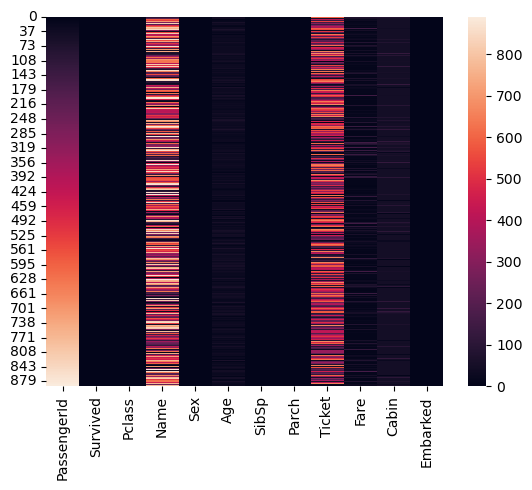

In [53]:
sns.heatmap(tdf_new)

In [56]:
lg=LogisticRegression()

In [58]:
lg.fit(train_x,train_y)

LogisticRegression()

In [59]:
pred=lg.predict(test_x)

In [60]:
pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [71]:
accuracy_score(test_y,pred)

0.7669491525423728

In [64]:
round(accuracy_score(test_y,pred),3)

0.767

In [65]:
confusion_matrix(test_y,pred)

array([[128,  24],
       [ 31,  53]], dtype=int64)

In [66]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       152
           1       0.69      0.63      0.66        84

    accuracy                           0.77       236
   macro avg       0.75      0.74      0.74       236
weighted avg       0.76      0.77      0.76       236

